<a href="https://colab.research.google.com/github/Ekaagra08/Retail-EDA/blob/main/Section1_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importing Libraries

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import datetime

# Loading Dataset

In [ ]:
df=pd.concat(pd.read_excel("/content/drive/MyDrive/RetailPulse_assignment/Section1/RetailPulseAssignmentData.xlsx",sheet_name=None), ignore_index=True)

# Data Exploration

In [ ]:
df

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom
...,...,...,...,...,...,...,...,...
1067366,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
1067367,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
1067368,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France
1067369,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,2011-12-09 12:50:00,4.95,12680.0,France


In [ ]:
# Adding new column Total_price
df['Total_Price']= df.Price * df.Quantity
# dividing DateTime into multiple columns
df['Inv_Month'] = df['InvoiceDate'].dt.month 
df['Inv_Weekday'] = df['InvoiceDate'].dt.weekday 
df['Inv_Hour'] = df['InvoiceDate'].dt.hour
#df.drop(['InvoiceDate'], inplace=True, axis=1)
df

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,Total_Price,Inv_Month,Inv_Weekday,Inv_Hour
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom,83.40,12,1,7
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,81.00,12,1,7
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,81.00,12,1,7
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom,100.80,12,1,7
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom,30.00,12,1,7
...,...,...,...,...,...,...,...,...,...,...,...,...
1067366,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France,12.60,12,4,12
1067367,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France,16.60,12,4,12
1067368,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France,16.60,12,4,12
1067369,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,2011-12-09 12:50:00,4.95,12680.0,France,14.85,12,4,12


# Dataset sumary

## Some Basic Attributes Info:
* **Invoice :** Invoice ID.
* **StockCode :** Product identification code.
* **Description :** Product name or activity performed with the product.
* **Quantity :** Quantity of each product returned or purchased.
* **InvoiceDate	 :** Date of bill (can be purchase or return).
* **Price :** Price of each item.
* **Customer ID	 :** Customer identification code.
* **Country	 :** Country from where purchase or return was made.
* **Total_Price  :** Total price of similar items.



## Dataset Info:

**StockCode** (Attribute)
* 'TEST00(n)' : [description] -> Test sample 
* 'POST'      : [description] -> Postage 
* 'M'         : [description] -> Manual
* 'D'         : [description] -> Discount
* 'B'         : [description] -> Adjust bad debt

**Invoice** (Attribute)
* 'C.....' : Any invoice code starting with 'C' has negative price and quantity which indicates that the perticular order was cancelled

**Note :** 
* We can remove **'Manual'**, **'Postage'** and **'Test sample'** data for some evaluations
* We can remove the rows containing **NaN** values for some evaluations

# Data Cleaning

In [ ]:
df.dropna(inplace=True)
df.shape

(824364, 12)

In [ ]:
df.drop_duplicates(inplace=True)

In [ ]:
## Do corrections!

df[df['Customer ID']==12346.0]
df[df['StockCode']=='POST']
#df[df['Quantity']==80995]
#df[df['Price']<0]

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,Total_Price,Inv_Month,Inv_Weekday,Inv_Hour
89,489439,POST,POSTAGE,3,2009-12-01 09:28:00,18.00,12682.0,France,54.00,12,1,9
126,489444,POST,POSTAGE,1,2009-12-01 09:55:00,141.00,12636.0,USA,141.00,12,1,9
173,489447,POST,POSTAGE,1,2009-12-01 10:10:00,130.00,12362.0,Belgium,130.00,12,1,10
625,489526,POST,POSTAGE,6,2009-12-01 11:50:00,18.00,12533.0,Germany,108.00,12,1,11
927,C489538,POST,POSTAGE,-1,2009-12-01 12:18:00,9.58,15796.0,United Kingdom,-9.58,12,1,12
...,...,...,...,...,...,...,...,...,...,...,...,...
1066677,581494,POST,POSTAGE,2,2011-12-09 10:13:00,18.00,12518.0,Germany,36.00,12,4,10
1067191,581570,POST,POSTAGE,1,2011-12-09 11:59:00,18.00,12662.0,Germany,18.00,12,4,11
1067228,581574,POST,POSTAGE,2,2011-12-09 12:09:00,18.00,12526.0,Germany,36.00,12,4,12
1067229,581578,POST,POSTAGE,3,2011-12-09 12:16:00,18.00,12713.0,Germany,54.00,12,4,12


In [ ]:
df=df[~df.StockCode.str.contains('TEST00', na=False)]
df=df[~df.StockCode.isin(['M','POST'])]
df.shape

(794801, 12)

In [ ]:
# dataframe with all discounts
d_df = df[df.StockCode == 'D']
d_df.shape

(170, 12)

In [ ]:
# Rmoving cancelled invoices
df=df[~df['Invoice'].str.startswith('C',na=False)].copy()
df.shape

(776992, 12)

In [ ]:
print(df[df['Price']==0.0].shape)

(61, 12)


**We can see there are 61 values which have Price value zero i.e. they are free products. We can remove these entries as does not give any contribution in customer analysis.**

In [ ]:
#removing free items
df=df[df['Price']!=0.0]
df.shape

(776931, 12)

In [ ]:
df.loc[:, df.columns!='InvoiceDate'].describe(include='all').round(2)

,Invoice,StockCode,Description,Quantity,Price,Customer ID,Country,Total_Price,Inv_Month,Inv_Weekday,Inv_Hour
count,776931.0,776931,776931,776931.00,776931.00,776931.00,776931,776931.00,776931.00,776931.00,776931.00
unique,36670.0,4627,5280,NaN,NaN,NaN,41,NaN,NaN,NaN,NaN
top,576339.0,85123A,WHITE HANGING HEART T-LIGHT HOLDER,NaN,NaN,NaN,United Kingdom,NaN,NaN,NaN,NaN
freq,542.0,5023,5016,NaN,NaN,NaN,699748,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,13.51,2.97,15326.33,NaN,22.01,7.42,2.64,12.79
std,NaN,NaN,NaN,146.06,6.11,1692.69,NaN,225.92,3.42,1.95,2.29
min,NaN,NaN,NaN,1.00,0.00,12346.00,NaN,0.00,1.00,0.00,6.00
25%,NaN,NaN,NaN,2.00,1.25,13979.00,NaN,4.95,5.00,1.00,11.00
50%,NaN,NaN,NaN,6.00,1.95,15251.00,NaN,12.48,8.00,2.00,13.00
75%,NaN,NaN,NaN,12.00,3.75,16795.00,NaN,19.80,11.00,4.00,14.00


# Data Analysis

In [ ]:
df.Country.value_counts()[:5]

United Kingdom    699748
Germany            15791
EIRE               15541
France             13037
Netherlands         4981
Name: Country, dtype: int64

In [ ]:
df.loc[df.Country=='United Kingdom'].shape[0]/df.shape[0] *100

90.06565576608476

In [ ]:
country_grped = df.groupby('Country', as_index=False).sum().sort_values(by='Total_Price', ascending=False)[['Country','Total_Price']].round(2)
print(country_grped.head())

           Country  Total_Price
38  United Kingdom  14306597.82
10            EIRE    597012.43
24     Netherlands    549773.41
14         Germany    383419.24
13          France    309855.89


In [ ]:
(country_grped['Total_Price'].max() / country_grped['Total_Price'].sum())*100

83.67335459077222

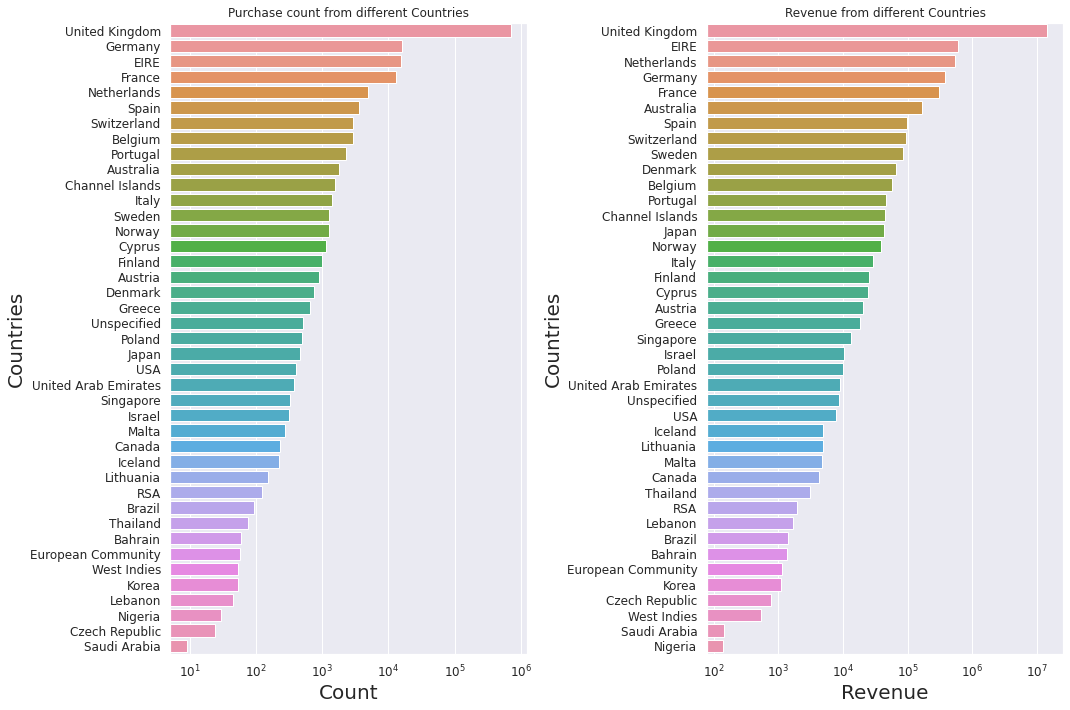

In [ ]:
plt.figure(figsize=(15,10))
sns.set_theme(style="darkgrid")
#########################################
plt.subplot(121)
plt.title("Purchase count from different Countries")
sns.countplot(y=df["Country"], data=df, order=df['Country'].value_counts().index)
plt.ylabel("Countries",fontsize=20)
plt.xlabel("Count",fontsize=20)
plt.yticks(fontsize=12)
plt.xticks(fontsize=12)
plt.xscale('log')
#########################################
plt.subplot(122)
plt.title("Revenue from different Countries")
sns.barplot(x=country_grped['Total_Price'], y=country_grped["Country"], data=country_grped)
plt.ylabel("Countries",fontsize=20)
plt.xlabel("Revenue",fontsize=20)
plt.yticks(fontsize=12)
plt.xticks(fontsize=12)
plt.xscale('log')
plt.tight_layout(pad=1)
plt.show()

In [ ]:
uk_df = df[df.Country=='United Kingdom']
uk_prod_grp = uk_df.groupby('StockCode', as_index=False)['Quantity'].sum().sort_values(by='Quantity', ascending=False)
uk_prod_grp 

,StockCode,Quantity
2890,84077,96736
4217,85123A,84503
4208,85099B,84313
2601,23843,80995
2199,23166,76919
...,...,...
4042,84867A,1
66,20620,1
2593,23664,1
3112,85043,1


**We can observe that purchase count from UK is exponentially high as compared to other countries**

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


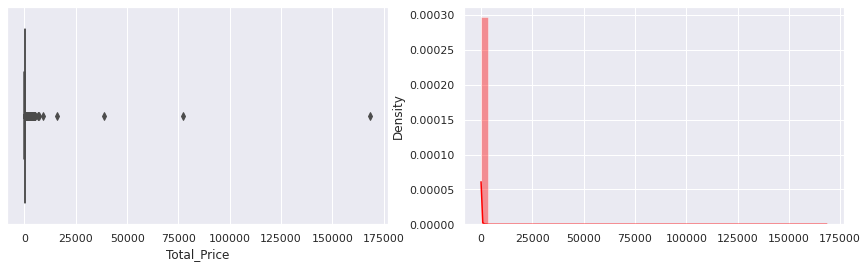

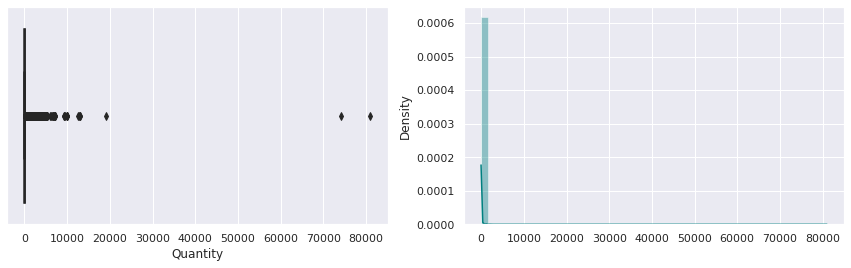

In [ ]:

def dist_plot(feature,colour,pos=121):
    plt.figure(figsize=(15,4))
    plt.subplot(pos)
    sns.boxplot(x=feature,data=df,color=colour)
    plt.subplot(pos+1)
    sns.distplot(x=df[feature],color=colour)
dist_plot("Total_Price","red")
dist_plot("Quantity","teal")

In [ ]:
# define outliers
price_outliers = np.percentile(df.Total_Price, [5,90])
quantity_outliers = np.percentile(df.Quantity, [5,90])
# create filters based on outliers
price_filter = (df.Total_Price > price_outliers[0]) & (df.Total_Price < price_outliers[1])
quantity_filter = (df.Quantity > quantity_outliers[0]) & (df.Quantity < price_outliers[1])
# apply filters
df1=df[(price_filter) & (quantity_filter)].copy()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


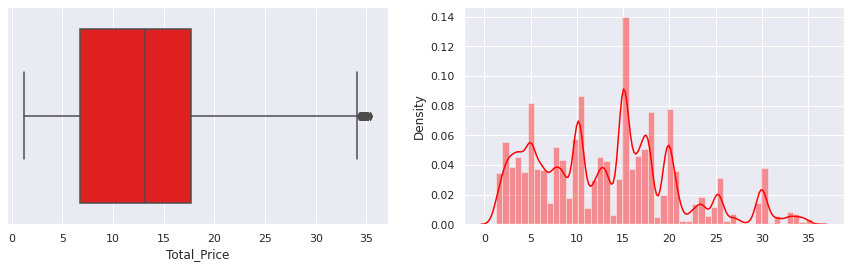

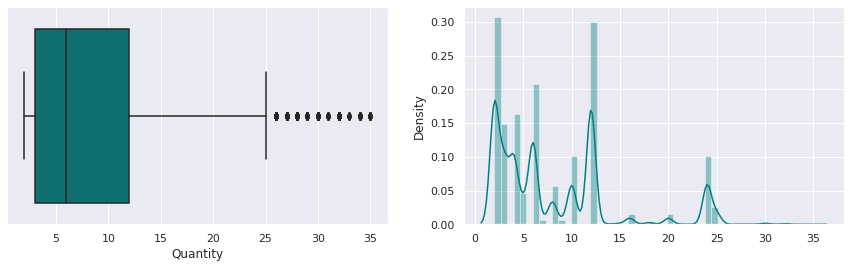

In [ ]:
def dist_plot(feature,colour,pos=121):
    plt.figure(figsize=(15,4))
    plt.subplot(pos)
    sns.boxplot(x=feature,data=df1,color=colour)
    plt.subplot(pos+1)
    sns.distplot(x=df1[feature],color=colour)
dist_plot("Total_Price","red")
dist_plot("Quantity","teal")

# **Q. Discuss customer's lifetime with respect to the given dataset.**

In [ ]:
cl_grp =df.groupby(['Customer ID'], as_index=False).agg({'InvoiceDate': lambda x:((x.max()-x.min()).days)+1}).sort_values(by='InvoiceDate', ascending=False)
cl_grp.columns=['Customer ID', 'Customer_Lifetime']
cl_grp.head()

,Customer ID,Customer_Lifetime
5676,18102.0,739
2924,15311.0,739
1235,13599.0,738
2528,14911.0,738
1409,13777.0,738


In [ ]:
cl_grp['Customer_Lifetime'].describe()

count    5862.000000
mean      274.263391
std       258.526186
min         1.000000
25%         1.000000
50%       222.000000
75%       512.000000
max       739.000000
Name: Customer_Lifetime, dtype: float64

# **Q. Can customers be segmented into different categories ?**

## Options for customer segmentation:
* **Total Purchases :** Total successful transactions made
* **Monetary :**  Total money spent on all the purchases in customer life time. 
* **Purchase Interval :**  Interval b/w purchases i.e. frequency of purchase
* **Recency :** Most recent purchase
* **Location :** Different countries

### Total purchases Analysis

In [ ]:
ctp_grp = pd.DataFrame(df.groupby('Customer ID', as_index=False)['Invoice'].nunique().sort_values(by='Invoice', ascending=False))
ctp_grp.columns=['Customer ID', 'Total_Purchases']
print(ctp_grp[:10])

      Customer ID  Total_Purchases
2528      14911.0              379
399       12748.0              323
5418      17841.0              211
2924      15311.0              207
737       13089.0              203
2230      14606.0              189
5426      17850.0              155
1785      14156.0              151
2270      14646.0              145
5676      18102.0              145


We have top 10 buyers

In [ ]:
print(ctp_grp['Total_Purchases'].describe())

count    5862.000000
mean        6.255544
std        12.810759
min         1.000000
25%         1.000000
50%         3.000000
75%         7.000000
max       379.000000
Name: Total_Purchases, dtype: float64


**we can see that most of the people have visited the retail store 6 times** 

### Monetary Analysis

In [ ]:
c_rev_grp = pd.DataFrame(df.groupby('Customer ID', as_index=False)['Total_Price'].sum().sort_values(by='Total_Price', ascending=False))
c_rev_grp.columns=['Customer ID', 'Total_Money_Paid']
print(c_rev_grp[:10])

      Customer ID  Total_Money_Paid
5676      18102.0         580987.04
2270      14646.0         526751.52
1785      14156.0         305259.17
2528      14911.0         280041.15
5036      17450.0         244784.25
1328      13694.0         195640.69
5095      17511.0         172132.87
4047      16446.0         168472.50
4281      16684.0         147142.77
68        12415.0         144033.37


Above we have top 10 money spenders

In [ ]:
print(c_rev_grp['Total_Money_Paid'].describe())

count      5862.000000
mean       2916.777987
std       14336.969558
min           2.950000
25%         338.725000
50%         855.220000
75%        2237.032500
max      580987.040000
Name: Total_Money_Paid, dtype: float64


**From above discriptive analysis we can assume that most people spend $2916 in their life time but since the std value is high we can't conclude this and will have to remove the outliers or we can check this using plots**

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


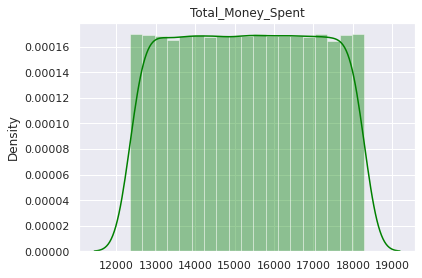

In [ ]:
plt.title('Total_Money_Spent')
sns.distplot(x=c_rev_grp['Customer ID'], color='green')
plt.tight_layout(pad=1)
plt.show()

### Purchase Interval Analysis

In [ ]:
f_grp = pd.concat([cl_grp, ctp_grp], axis=1)
f_grp = f_grp.loc[:, ~f_grp.columns.duplicated()]
f_grp['Purchase_Interval'] = f_grp['Customer_Lifetime'] / f_grp['Total_Purchases']
f_grp = f_grp[['Customer ID','Purchase_Interval']].sort_values(by='Purchase_Interval', ascending = False)
f_grp[f_grp['Purchase_Interval']>100]

,Customer ID,Purchase_Interval
2729,15115.0,357.500000
739,13091.0,351.000000
2568,14954.0,345.500000
3731,16127.0,344.000000
2421,14799.0,343.500000
...,...,...
567,12917.0,100.500000
2087,14463.0,100.500000
4482,16888.0,100.333333
4685,17095.0,100.285714


Above are the top 10 most frequent customers

In [ ]:
f_grp['Purchase_Interval'].describe()

count    5862.000000
mean       50.986355
std        55.056898
min         0.166667
25%         1.000000
50%        37.303030
75%        76.870536
max       357.500000
Name: Purchase_Interval, dtype: float64

### Recency analysis

In [ ]:
max_date=max(df['InvoiceDate'])+datetime.timedelta(days=1)

In [ ]:
rec_grp=df.groupby(['Customer ID'], as_index = False).agg({'InvoiceDate': lambda x: (max_date - x.max()).days})
rec_grp.columns=['Customer ID', 'Recency']
rec_grp[rec_grp.Recency > 365]

,Customer ID,Recency
5,12351.0,375
20,12366.0,634
22,12368.0,628
23,12369.0,413
30,12376.0,390
...,...,...
5849,18275.0,578
5853,18279.0,519
5858,18284.0,432
5859,18285.0,661


In [ ]:
rec_grp.Recency.describe()

count    5862.000000
mean      200.867793
std       209.095351
min         1.000000
25%        26.000000
50%        95.500000
75%       379.000000
max       739.000000
Name: Recency, dtype: float64

### Categorizing

In [ ]:
l_grp = pd.concat([rec_grp, ctp_grp, c_rev_grp, f_grp], axis=1)
l_grp = l_grp.loc[:, ~l_grp.columns.duplicated()]
l_grp

,Customer ID,Recency,Total_Purchases,Total_Money_Paid,Purchase_Interval
0,12346.0,326,3,77352.96,107.333333
1,12347.0,2,8,4921.53,50.375000
2,12348.0,75,5,1658.40,72.600000
3,12349.0,19,3,3678.69,190.333333
4,12350.0,310,1,294.40,1.000000
...,...,...,...,...,...
5857,18283.0,4,22,2658.95,29.772727
5858,18284.0,432,1,461.68,1.000000
5859,18285.0,661,1,427.00,1.000000
5860,18286.0,477,2,1296.43,124.000000


In [ ]:
l_grp['R_score'] = pd.qcut(l_grp['Recency'],3,['3','2','1'])
l_grp['TP_score'] = pd.qcut(l_grp['Total_Purchases'],3,['1','2','3'])
l_grp['TMP_score'] = pd.qcut(l_grp['Total_Money_Paid'],3,['1','2','3'])
l_grp['PI_score'] = pd.qcut(l_grp['Purchase_Interval'],3,['3','2','1'])

In [ ]:
l_grp[['R_score',	'TP_score',	'TMP_score',	'PI_score']] = l_grp[['R_score',	'TP_score',	'TMP_score',	'PI_score']].apply(pd.to_numeric)
l_grp['sum_score'] = l_grp['R_score'] + l_grp.TP_score +	l_grp.TMP_score +	l_grp.PI_score
l_grp.head()

,Customer ID,Recency,Total_Purchases,Total_Money_Paid,Purchase_Interval,R_score,TP_score,TMP_score,PI_score,sum_score
0,12346.0,326,3,77352.96,107.333333,1,2,3,1,7
1,12347.0,2,8,4921.53,50.375000,3,3,3,2,11
2,12348.0,75,5,1658.40,72.600000,2,2,3,1,8
3,12349.0,19,3,3678.69,190.333333,3,2,3,1,9
4,12350.0,310,1,294.40,1.000000,1,1,1,3,6


In [ ]:
def categorize(s):
  if(s>=9):
    return 'Loyal'
  elif s>=6 and s<9:
    return 'Good' 
  elif s>=4 and s<6:
    return 'Bad' 

l_grp['Category']=l_grp['sum_score'].apply(categorize)     

In [ ]:
l_grp[['Customer ID','Category']]

,Customer ID,Category
0,12346.0,Good
1,12347.0,Loyal
2,12348.0,Good
3,12349.0,Loyal
4,12350.0,Good
...,...,...
5857,18283.0,Loyal
5858,18284.0,Good
5859,18285.0,Good
5860,18286.0,Bad


In [ ]:
c_count=l_grp.groupby(['Category'],as_index = False).nunique()[['Category','Customer ID']]
c_count.columns=['Category','Count']
c_sum = c_count.Count.sum()
c_count['%']=c_count.Count.apply(lambda x: (x/c_sum *100).round(2))
c_count

,Category,Count,%
0,Bad,330,5.63
1,Good,3502,59.74
2,Loyal,2030,34.63


# **Q. Which Customer is Loyal?**

### Their can be 2 types of customers:

* **Type 1**: A coustomer who buys frequently from shop
* **Type 2**: A coustomer who buys less frequently but spends more than avg. at every purchase
 
**A loyal custromer would fall in the type 1 category**

In [ ]:
l_grp[l_grp.Category == 'Loyal'][['Customer ID','Category']]

,Customer ID,Category
1,12347.0,Loyal
3,12349.0,Loyal
6,12352.0,Loyal
10,12356.0,Loyal
12,12358.0,Loyal
...,...,...
5834,18260.0,Loyal
5846,18272.0,Loyal
5850,18276.0,Loyal
5857,18283.0,Loyal


Group of loyal customers

# **Q. What is the most popular time of year based on this sales data?**


In [ ]:
dct_df = df[df.StockCode == 'D']
wdct_df = df[df.StockCode !='D']
print(df.shape, dct_df.shape, wdct_df.shape)

(776931, 12) (5, 12) (776926, 12)


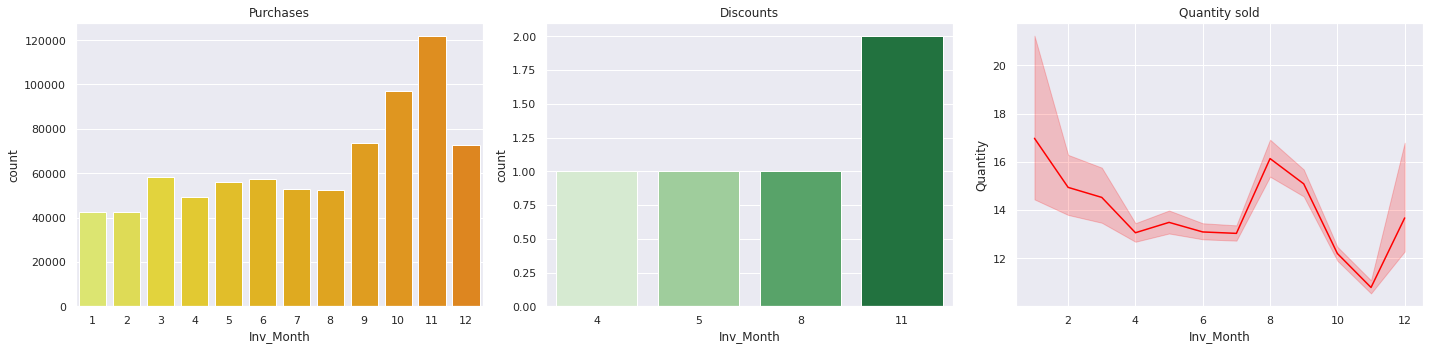

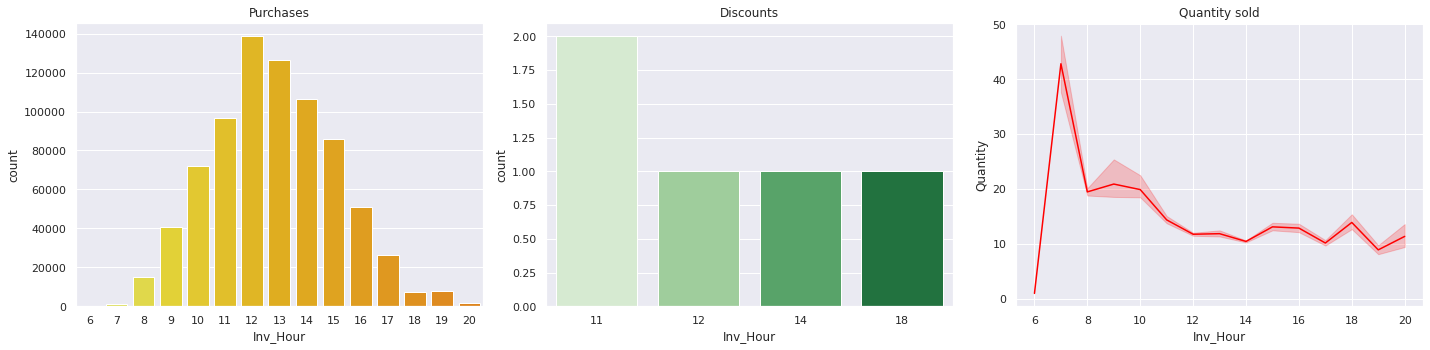

In [ ]:
def compare_plot(feature):
    plt.figure(figsize=(20,5))
   ##########################################################
    plt.subplot(131)
    plt.title('Purchases')
    sns.countplot(x=df[feature], data=df, palette='Wistia')
   ##########################################################
    plt.subplot(132)
    plt.title('Discounts')
    sns.countplot(x=dct_df[feature], data=dct_df, palette='Greens')
   ##########################################################
    plt.subplot(133)
    plt.title('Quantity sold')
    sns.lineplot(x=df[feature], y='Quantity', data=df, color='red')
   ##########################################################
    plt.tight_layout(pad=1)
    plt.show()
compare_plot("Inv_Month")
compare_plot("Inv_Hour")

In [ ]:
df[['Inv_Month', 'Inv_Hour']].describe()

,Inv_Month,Inv_Hour
count,776931.000000,776931.000000
mean,7.417814,12.793181
std,3.422257,2.293767
min,1.000000,6.000000
25%,5.000000,11.000000
50%,8.000000,13.000000
75%,11.000000,14.000000
max,12.000000,20.000000


**Monthly Analysis:**
* Based on above observations **purchases increase at the end of the year** :
 * **Highest** : **November**
 * **High** : **[September** to **December]** 
 * **Low** : **[January** to **February]**
 * **Lowest** : **January**
* While number of quantities purchased at a time are:
 * **Highest** : **August**
 * **Lowest** : **November**

**NOTE** : In month of Nov. the number of sales are high but number of quantities bought are less

**Hourly Analysis:**
* Based on above observations **purchases start increasing from 8am till 12 Noon and then decrease till 7pm** :
 * **Highest** : **12pm**
 * **Very Low** : **6am, 7am, 8pm**
* While number of quantities purchased at a time are **high in Morning**:
 * **Highest** : **7am**
 * **Lowest** : **12pm - 2pm**


# **Q. Is there any seasonality in data? Explain with supportive evidence.**
